In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import statsmodels.formula.api as smf

In [10]:
#Bring file into the notebook
df = pd.read_csv(r'C:\Users\ACER\Documents\Aviation Accident/aviation-accident-data-2023-05-16.csv')

In [8]:
df.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23967 entries, 0 to 23966
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23967 non-null  object
 1   type          23967 non-null  object
 2   registration  22419 non-null  object
 3   operator      23963 non-null  object
 4   fatalities    20029 non-null  object
 5   location      23019 non-null  object
 6   country       23967 non-null  object
 7   cat           23967 non-null  object
 8   year          23967 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


In [15]:
#Mendeteksi data kosong or missing data
df[df['location'].isnull()]

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
5,date unk.,Antonov An-12BP,CCCP-12172,Soviet AF,NaN,NaN,Russia,U1,unknown
8,date unk.,Antonov An-24B,RA-47794,Russian AF,0,NaN,Russia,A1,unknown
...,...,...,...,...,...,...,...,...,...
19791,15-APR-2003,Vickers 836 Viscount,9Q-CGL,Trans Intair,0,NaN,D.R. Congo,A1,2003
19806,10-MAY-2003,Antonov An-2R,UK-68038,Uzbekistan Airways,NaN,NaN,Unknown country,A2,2003
20002,02-MAY-2004,Yakovlev Yak-40,YV-1070CP,CIACA Airlines,NaN,NaN,Guatemala,A1,2004
20077,11-SEP-2004,Lockheed C-130H Hercules,NaN,USAF,0,NaN,Iraq,C2,2004


In [30]:
# check if there's repeated values
## there is any repeated aviation accident date
df.date.value_counts()

date
10-MAY-1940    171
date unk.       61
24-MAR-1945     50
06-JUN-1944     41
17-SEP-1944     35
              ... 
04-MAY-1971      1
06-MAY-1971      1
07-MAY-1971      1
08-MAY-1971      1
15-MAY-2023      1
Name: count, Length: 15079, dtype: int64

In [44]:
#filter to country only is Indonesia
df_Indonesia = df[(df.country == "Indonesia")]
df_Indonesia.head()

,date,type,registration,operator,fatalities,location,country,cat,year
172,19-APR-1931,DH.66 Hercules,G-EBMW,Imperial Airways,0,near Kupang,Indonesia,A1,1931
364,06-OCT-1937,Douglas DC-3-194B,PH-ALS,KLM,4,Palembang-Talang...,Indonesia,A1,1937
464,12-MAR-1939,Short S.23 Empire Flying Boat Mk I,G-ADUY,"Imperial Airways, op.for Qantas Empire Airways",0,"Tandjong, Batavi...",Indonesia,A1,1939
517,22-JAN-1940,Lockheed 14-WF62 Super Electra,PK-AFO,KNILM,8,near Denpasar-Ngurah ...,Indonesia,A1,1940
969,13-OCT-1941,Lockheed 18 Lodestar,LT-910,Netherlands East Indies AF,5+ 7,Batavia,Indonesia,A1,1941


In [39]:
df_Indonesia['date']

172      19-APR-1931
364      06-OCT-1937
464      12-MAR-1939
517      22-JAN-1940
969      13-OCT-1941
            ...     
23852    30-AUG-2022
23906    23-DEC-2022
23960    09-MAY-2023
23962    11-MAY-2023
23963    11-MAY-2023
Name: date, Length: 437, dtype: object

In [40]:
df_Indonesia.date.value_counts()

date
28-JUL-1944    3
11-MAY-2023    2
21-NOV-1944    2
03-AUG-2017    2
15-MAR-1952    2
              ..
07-OCT-1975    1
24-SEP-1975    1
07-SEP-1974    1
26-MAY-1974    1
09-MAY-1991    1
Name: count, Length: 423, dtype: int64

In [41]:
# show's country percentage
df.country.value_counts()/len(df)*100

country
USA                18.262611
Russia              5.933158
Unknown country     3.496474
U.K.                3.492302
Canada              3.446405
                     ...    
Reunion             0.004172
Cook Isl.           0.004172
Guinea-Bissau       0.004172
Monaco              0.004172
Macau               0.004172
Name: count, Length: 232, dtype: float64

Text(0.5, 1.0, 'Aviation accident')

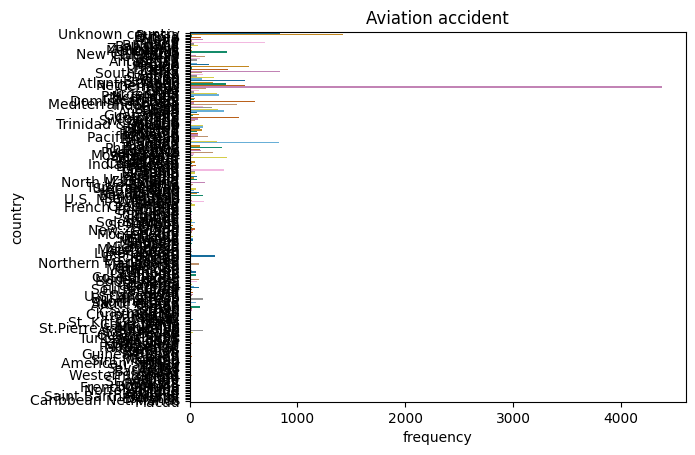

In [42]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"

ax = sns.countplot(y = df.country, palette = 'colorblind')
ax.set(xlabel = 'frequency', ylabel = 'country')
plt.title("Aviation accident")